<a href="https://colab.research.google.com/github/hamzan63016/Spamming_email/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9063 - loss: 0.3324 - val_accuracy: 0.9760 - val_loss: 0.0778
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9813 - loss: 0.0611 - val_accuracy: 0.9833 - val_loss: 0.0498
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9873 - loss: 0.0391 - val_accuracy: 0.9820 - val_loss: 0.0575
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9907 - loss: 0.0282 - val_accuracy: 0.9848 - val_loss: 0.0494
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9935 - loss: 0.0210 - val_accuracy: 0.9867 - val_loss: 0.0448
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9845 - loss: 0.0548
Test accuracy: 0.99
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Prediction: 7, Label: 7
Prediction: 2, Label: 2
Prediction: 1, Label: 1
Prediction: 0, Label: 0
Prediction: 4, Label: 4
Prediction: 1, Label: 1
Prediction: 4, Label: 4
Prediction: 9, Label: 9
Prediction: 5, La

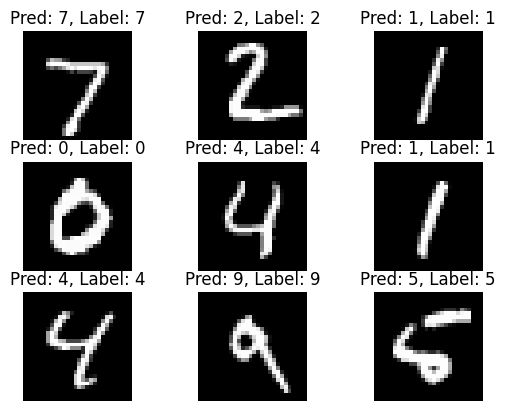

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [4]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9020 - loss: 0.3308 - val_accuracy: 0.9807 - val_loss: 0.0622
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9831 - loss: 0.0588 - val_accuracy: 0.9824 - val_loss: 0.0552
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9882 - loss: 0.0385 - val_accuracy: 0.9845 - val_loss: 0.0481
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9925 - loss: 0.0246 - val_accuracy: 0.9836 - val_loss: 0.0467
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9946 - loss: 0.0172 - val_accuracy: 0.9842 - val_loss: 0.0485


In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9800 - loss: 0.0646
Test accuracy: 0.98


In [10]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


Prediction: 7, Label: 7
Prediction: 2, Label: 2
Prediction: 1, Label: 1
Prediction: 0, Label: 0
Prediction: 4, Label: 4
Prediction: 1, Label: 1
Prediction: 4, Label: 4
Prediction: 9, Label: 9
Prediction: 5, Label: 5


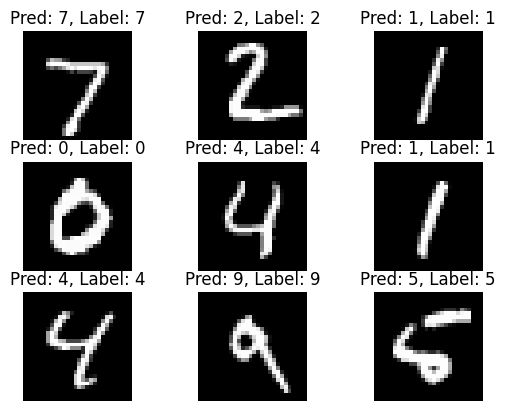

In [11]:
for i in range(9):
    img = X_test[i]
    pred = np.argmax(predictions[i])
    label = y_test[i]
    print(f'Prediction: {pred}, Label: {label}')
    plt.subplot(3, 3, i+1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {pred}, Label: {label}')
    plt.axis('off')
plt.show()
